In [2]:
import numpy as np

class CellularAutomaton:
    def __init__(self, rule_number, width=1000, steps=1000):
        self.rule_number = rule_number
        self.width = width
        self.steps = steps
        self.rule_array = self._get_rule_array(rule_number)
        
    def _get_rule_array(self, n):
        rule_binary = format(n, '08b')
        return np.array([int(rule_binary[7 - i]) for i in range(8)], dtype=np.int8)
    
    def _get_next_state(self, current_state):
        padded = np.pad(current_state, 1, mode='wrap')
        
        left = padded[:-2]
        center = padded[1:-1]
        right = padded[2:]
        
        neighborhood_int = (left << 2) | (center << 1) | right
        
        next_state = self.rule_array[neighborhood_int]
        return next_state
    
    def run(self, initial_state=None):
        if initial_state is None:
            initial_state = np.random.randint(0, 2, self.width, dtype=np.int8)
        states = np.zeros((self.steps, self.width), dtype=np.int8)
        states[0] = initial_state
        
        for i in range(1, self.steps):
            states[i] = self._get_next_state(states[i-1])
        
        return states

def generate_xor_sequence(rule1=30, rule2=60, width=1000, steps=1000, output_file="xor_30_60.bin"):
    ca1 = CellularAutomaton(rule1, width, steps)
    ca2 = CellularAutomaton(rule2, width, steps)
    grid1 = ca1.run()
    grid2 = ca2.run()
    
    # XOR the center column
    center_index = width // 2
    xor_grid = np.logical_and(grid1, grid2).astype(np.uint8)[:, center_index]
    bits = xor_grid

    num_bits = len(bits)
    if num_bits % 8 != 0:
        bits = np.append(bits, np.zeros(8 - (num_bits % 8), dtype=np.uint8))
    
    bit_bytes = bits.reshape(-1, 8)
    byte_values = np.packbits(bit_bytes, axis=1).flatten()
    
    with open(output_file, "wb") as f:
        f.write(byte_values.tobytes())
    print(f"Binary file '{output_file}' written with {len(byte_values)*8} bits.")


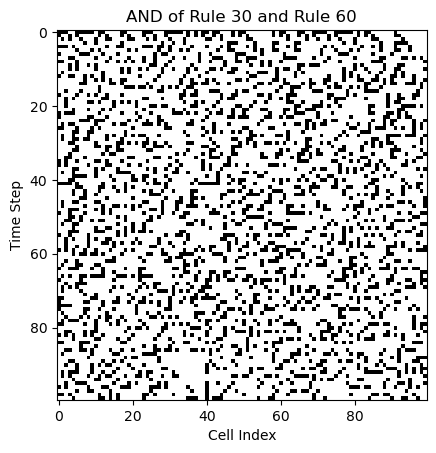

In [147]:
import matplotlib.pyplot as plt

rule = 30
rule1 = 60


np.random.seed(20)
grid = CellularAutomaton(rule,100,100).run()
np.random.seed(20)
grid1 = CellularAutomaton(rule1,100,100).run()
xor_grid = np.logical_and(grid, grid1).astype(np.uint8)


plt.imshow(xor_grid, cmap='binary')
plt.title(f'AND of Rule 30 and Rule 60')
plt.xlabel('Cell Index')
plt.ylabel('Time Step')
plt.show()


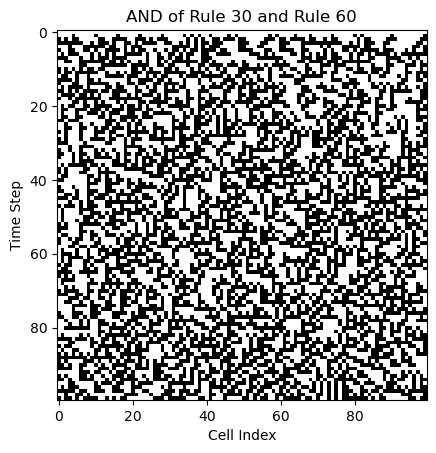

In [4]:
import matplotlib.pyplot as plt

rule = 30
rule1 = 60


np.random.seed(20)
grid = CellularAutomaton(rule,100,100).run()
np.random.seed(20)
grid1 = CellularAutomaton(rule1,100,100).run()
xor_grid = np.logical_xor(grid, grid1).astype(np.uint8)


plt.imshow(xor_grid, cmap='binary')
plt.title(f'AND of Rule 30 and Rule 60')
plt.xlabel('Cell Index')
plt.ylabel('Time Step')
plt.show()


In [ ]:
import numpy as np

class CellularAutomaton:
    def __init__(self, rule_number, width=1000, steps=1000):
        self.rule_number = rule_number
        self.width = width
        self.steps = steps
        self.rule_array = self._get_rule_array(rule_number)
        
    def _get_rule_array(self, n):
        rule_binary = format(n, '08b')
        return np.array([int(rule_binary[7 - i]) for i in range(8)], dtype=np.int8)
    
    def _get_next_state(self, current_state, rule_array):
        padded = np.pad(current_state, 1, mode='wrap')
        
        left = padded[:-2]
        center = padded[1:-1]
        right = padded[2:]
        
        neighborhood_int = (left << 2) | (center << 1) | right
        
        next_state = rule_array[neighborhood_int]
        return next_state

def run_alternating_rules(rule1, rule2, width=1000, steps=1000, initial_state=None):
    ca1 = CellularAutomaton(rule1, width, steps)
    ca2 = CellularAutomaton(rule2, width, steps)
    
    if initial_state is None:
        current_state = np.random.randint(0, 2, width, dtype=np.int8)
    else:
        current_state = initial_state.copy()
    
    states = np.zeros((steps, width), dtype=np.int8)
    states[0] = current_state
    
    for i in range(1, steps):
        if i % 2 == 0:
            current_state = ca1._get_next_state(current_state, ca1.rule_array)
        else:
            current_state = ca2._get_next_state(current_state, ca2.rule_array)
        
        states[i] = current_state
        
    return states

def generate_xor_sequence(rule1=30, rule2=60, width=1000, steps=1000, output_file="xor_alternating_30_60.bin"):
    grid = run_alternating_rules(rule1, rule2, width, steps)
    
    center_index = width // 2
    bits = grid[:, center_index].astype(np.uint8)

    num_bits = len(bits)
    if num_bits % 8 != 0:
        bits = np.append(bits, np.zeros(8 - (num_bits % 8), dtype=np.uint8))
    
    bit_bytes = bits.reshape(-1, 8)
    byte_values = np.packbits(bit_bytes, axis=1).flatten()
    
    with open(output_file, "wb") as f:
        f.write(byte_values.tobytes())
    print(f"Binary file '{output_file}' written with {len(byte_values)*8} bits.")


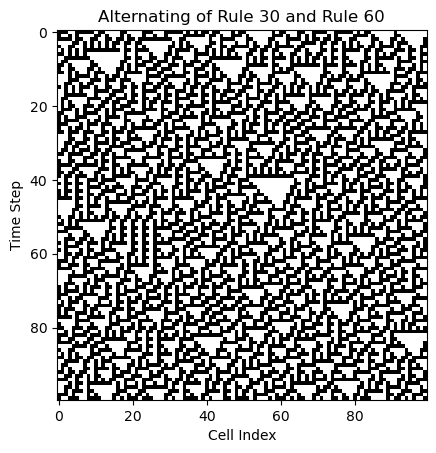

In [100]:
np.random.seed(20)
grid = run_alternating_rules(30, 60, 100, 100)
plt.imshow(grid, cmap='binary')
plt.title(f'Alternating of Rule 30 and Rule 60')
plt.xlabel('Cell Index')
plt.ylabel('Time Step')
plt.show()

In [136]:
import numpy as np

class CellularAutomaton:
    def __init__(self, rule_number, width=1000, steps=1000):
        self.rule_number = rule_number
        self.width = width
        self.steps = steps
        self.rule_array = self._get_rule_array(rule_number)
        
    def _get_rule_array(self, n):
        rule_binary = format(n, '08b')
        return np.array([int(rule_binary[7 - i]) for i in range(8)], dtype=np.int8)
    
    def _get_neighborhood_int(self, current_state):
        padded = np.pad(current_state, 1, mode='wrap')
        
        left = padded[:-2]
        center = padded[1:-1]
        right = padded[2:]
        
        neighborhood_int = (left << 2) | (center << 1) | right
        return neighborhood_int

def run_cell_parity_rules(rule1, rule2, width=1000, steps=1000, initial_state=None):
    ca1 = CellularAutomaton(rule1, width, steps)
    ca2 = CellularAutomaton(rule2, width, steps)
    
    if initial_state is None:
        current_state = np.random.randint(0, 2, width, dtype=np.int8)
    else:
        current_state = initial_state.copy()
    
    states = np.zeros((steps, width), dtype=np.int8)
    states[0] = current_state
    
    even_indices = np.arange(width) % 2 == 0
    odd_indices = ~even_indices
    
    for i in range(1, steps):
        neighborhood_int = ca1._get_neighborhood_int(current_state)
        
        next_state = np.zeros_like(current_state)
        next_state[even_indices] = ca1.rule_array[neighborhood_int[even_indices]]
        next_state[odd_indices] = ca2.rule_array[neighborhood_int[odd_indices]]
        
        states[i] = next_state
        current_state = next_state
    
    return states

def generate_xor_sequence(rule1=30, rule2=60, width=1000, steps=1000, output_file="xor_parity_30_60.bin"):
    grid = run_cell_parity_rules(rule1, rule2, width, steps)
    
    center_index = width // 2
    bits = grid[:, center_index].astype(np.uint8)

    num_bits = len(bits)
    if num_bits % 8 != 0:
        bits = np.append(bits, np.zeros(8 - (num_bits % 8), dtype=np.uint8))
    
    bit_bytes = bits.reshape(-1, 8)
    byte_values = np.packbits(bit_bytes, axis=1).flatten()
    
    with open(output_file, "wb") as f:
        f.write(byte_values.tobytes())
    print(f"Binary file '{output_file}' written with {len(byte_values)*8} bits.")

generate_xor_sequence(rule1=30, rule2=60, width=100, steps=50000000, output_file="xor_parity_30_60.bin")

Binary file 'xor_parity_30_60.bin' written with 50000000 bits.


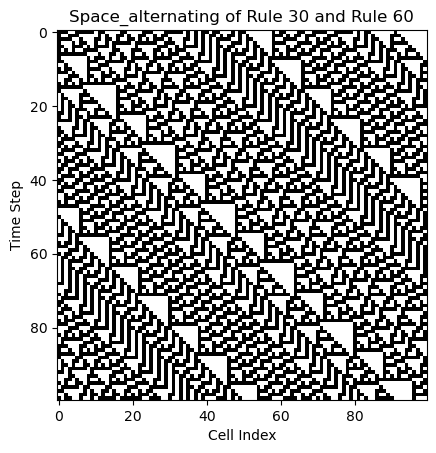

In [137]:
np.random.seed(20)
grid = run_cell_parity_rules(30, 60, 100, 100)
plt.imshow(grid, cmap='binary')
plt.title(f'Space_alternating of Rule 30 and Rule 60')
plt.xlabel('Cell Index')
plt.ylabel('Time Step')
plt.show()

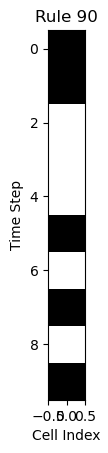

In [124]:
np.random.seed(20)
rule = 90
grid = CellularAutomaton(rule,100,10).run()
center = grid[:,50].reshape(10,1)
plt.imshow(center, cmap='binary')
plt.title(f'Rule 90')
plt.xlabel('Cell Index')
plt.ylabel('Time Step')
plt.show()

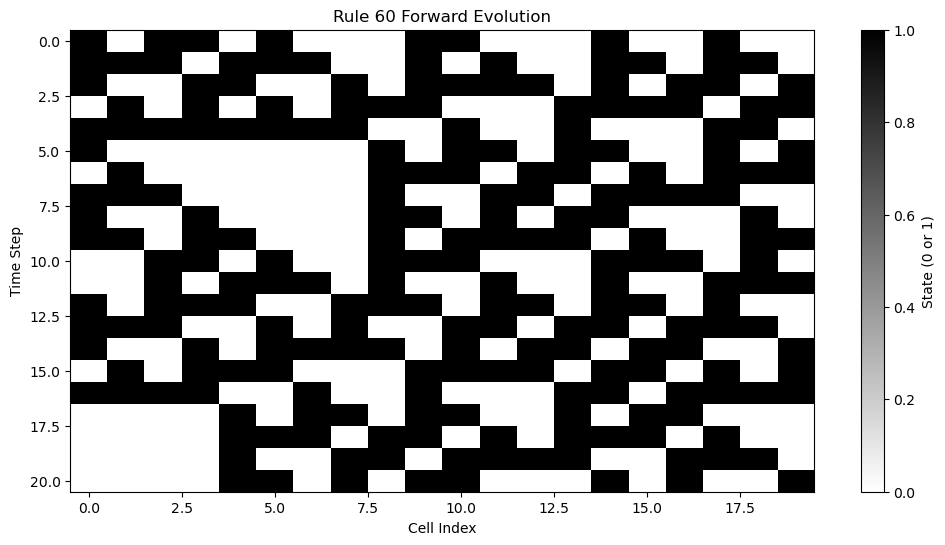

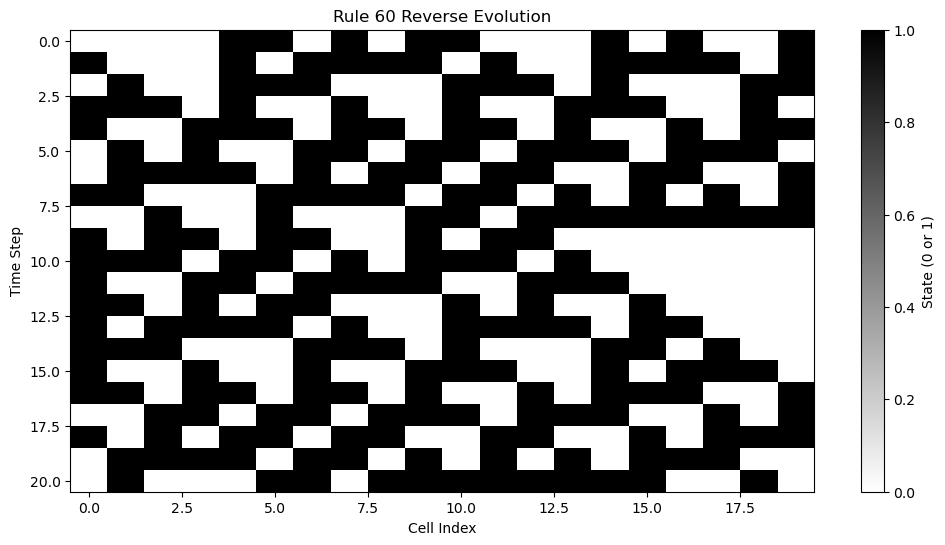

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def run_rule_60_forward(grid, steps):
    n = len(grid)
    evolution = [grid.copy()]
    
    for _ in range(steps):
        new_grid = np.zeros_like(grid)
        for i in range(n):
            left = grid[(i - 1) % n]  
            center = grid[i]
            new_grid[i] = left ^ center  
        evolution.append(new_grid)
        grid = new_grid  
    
    return np.array(evolution)

def run_rule_60_reverse(grid, steps):
    n = len(grid)
    evolution = [grid.copy()]
    
    for _ in range(steps):
        new_grid = np.zeros_like(grid)
        for i in range(n):
            left = grid[(i - 1) % n]  
            center = grid[i]
            new_grid[i] = left ^ center  
        evolution.append(new_grid)
        grid = new_grid  
    
    return np.array(evolution)


def plot_rule_60_evolution(forward_evolution, reverse_evolution):
    steps_forward, grid_size = forward_evolution.shape
    steps_reverse, _ = reverse_evolution.shape
    
    plt.figure(figsize=(12, 6))
    plt.title("Rule 60 Forward Evolution")
    plt.imshow(forward_evolution, cmap="binary", aspect="auto")
    plt.xlabel("Cell Index")
    plt.ylabel("Time Step")
    plt.colorbar(label='State (0 or 1)')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.title("Rule 60 Reverse Evolution")
    plt.imshow(reverse_evolution, cmap="binary", aspect="auto")
    plt.xlabel("Cell Index")
    plt.ylabel("Time Step")
    plt.colorbar(label='State (0 or 1)')
    plt.show()


grid_size = 20  
initial_grid = np.random.randint(0, 2, grid_size)  
steps = 20  

forward_evolution = run_rule_60_forward(initial_grid, steps)
final_state = forward_evolution[-1]  
reverse_evolution = run_rule_60_reverse(final_state, steps)

plot_rule_60_evolution(forward_evolution, reverse_evolution)
